In [1]:
include("../lib/Lib.jl")

using DataFrames, DataFramesMeta
using CSV

In [2]:
KEY = "2019wk1"
YEAR = "2019"

"2019"

In [10]:
"alpha" * "bet"

"alphabet"

In [14]:
headers = CSV.read("../data/$(YEAR)_headers.csv") |> (h -> String.(names(h)))
red_headers = [h * "_red" for h in headers]
blue_headers = [h * "_blue" for h in headers]
headers_wide = [red_headers; blue_headers; "key"; "level"; "event"]

105-element Array{String,1}:
 "adjustPoints_red"              
 "autoPoints_red"                
 "bay1_red"                      
 "bay2_red"                      
 "bay3_red"                      
 "bay4_red"                      
 "bay5_red"                      
 "bay6_red"                      
 "bay7_red"                      
 "bay8_red"                      
 "cargoPoints_red"               
 "completeRocketRankingPoint_red"
 "completedRocketFar_red"        
 ⋮                               
 "rp_blue"                       
 "sandStormBonusPoints_blue"     
 "techFoulCount_blue"            
 "teleopPoints_blue"             
 "topLeftRocketFar_blue"         
 "topLeftRocketNear_blue"        
 "topRightRocketFar_blue"        
 "topRightRocketNear_blue"       
 "totalPoints_blue"              
 "key"                           
 "level"                         
 "event"                         

In [19]:
scores_wide = CSV.read("../data/matches_$(KEY)_wide.csv", header=headers_wide)

,adjustPoints_red,autoPoints_red,bay1_red,bay2_red,bay3_red,bay4_red,bay5_red,bay6_red,bay7_red,bay8_red,cargoPoints_red,completeRocketRankingPoint_red,completedRocketFar_red,completedRocketNear_red,endgameRobot1_red,endgameRobot2_red,endgameRobot3_red,foulCount_red,foulPoints_red,habClimbPoints_red,habDockingRankingPoint_red,habLineRobot1_red,habLineRobot2_red,habLineRobot3_red,hatchPanelPoints_red,lowLeftRocketFar_red,lowLeftRocketNear_red,lowRightRocketFar_red,lowRightRocketNear_red,midLeftRocketFar_red,midLeftRocketNear_red,midRightRocketFar_red,midRightRocketNear_red,preMatchBay1_red,preMatchBay2_red,preMatchBay3_red,preMatchBay6_red,preMatchBay7_red,preMatchBay8_red,preMatchLevelRobot1_red,preMatchLevelRobot2_red,preMatchLevelRobot3_red,rp_red,sandStormBonusPoints_red,techFoulCount_red,teleopPoints_red,topLeftRocketFar_red,topLeftRocketNear_red,topRightRocketFar_red,topRightRocketNear_red,totalPoints_red,adjustPoints_blue,autoPoints_blue,bay1_blue,bay2_blue,bay3_blue,bay4_blue,bay5_blue,bay6_blue,bay7_blue,bay8_blue,cargoPoints_blue,completeRocketRankingPoint_blue,completedRocketFar_blue,completedRocketNear_blue,endgameRobot1_blue,endgameRobot2_blue,endgameRobot3_blue,foulCount_blue,foulPoints_blue,habClimbPoints_blue,habDockingRankingPoint_blue,habLineRobot1_blue,habLineRobot2_blue,habLineRobot3_blue,hatchPanelPoints_blue,lowLeftRocketFar_blue,lowLeftRocketNear_blue,lowRightRocketFar_blue,lowRightRocketNear_blue,midLeftRocketFar_blue,midLeftRocketNear_blue,midRightRocketFar_blue,midRightRocketNear_blue,preMatchBay1_blue,preMatchBay2_blue,preMatchBay3_blue,preMatchBay6_blue,preMatchBay7_blue,preMatchBay8_blue,preMatchLevelRobot1_blue,preMatchLevelRobot2_blue,preMatchLevelRobot3_blue,rp_blue,sandStormBonusPoints_blue,techFoulCount_blue,teleopPoints_blue,topLeftRocketFar_blue,topLeftRocketNear_blue,topRightRocketFar_blue,topRightRocketNear_blue,totalPoints_blue,key,level,event
,Int64⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Bool⍰,Bool⍰,Bool⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Bool⍰,String⍰,String⍰,String⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Bool⍰,Bool⍰,Bool⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Bool⍰,String⍰,String⍰,String⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,String⍰,String⍰,String⍰
1,0,15,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,30,false,false,false,HabLevel3,HabLevel1,HabLevel1,0,0,18,false,CrossedHabLineInSandstorm,CrossedHabLineInSandstorm,CrossedHabLineInSandstorm,10,PanelAndCargo,Panel,None,PanelAndCargo,None,None,None,None,Panel,Panel,Panel,Panel,Panel,Panel,HabLevel2,HabLevel2,HabLevel1,0,15,0,58,None,None,None,None,73,0,15,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,Panel,Panel,Panel,15,false,false,false,HabLevel2,HabLevel1,HabLevel2,0,0,15,false,CrossedHabLineInSandstorm,CrossedHabLineInSandstorm,CrossedHabLineInSandstorm,6,None,None,None,None,None,None,None,None,Panel,Panel,Cargo,Panel,Panel,Panel,HabLevel1,HabLevel2,HabLevel2,0,15,0,36,None,None,None,None,51,2019qcmo_f1m1,f,2019qcmo
2,0,15,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,PanelAndCargo,33,false,false,false,HabLevel3,HabLevel2,None,0,3,18,false,CrossedHabLineInSandstorm,CrossedHabLineInSandstorm,CrossedHabLineInSandstorm,14,Panel,PanelAndCargo,PanelAndCargo,PanelAndCargo,Panel,None,None,None,Panel,Panel,Panel,Panel,Panel,Panel,HabLevel2,HabLevel2,HabLevel1,0,15,0,65,None,None,None,None,83,0,15,Panel,Panel,PanelAndCargo,None

In [62]:
score_keys = Array{Union{String,Nothing}}(nothing,(110,110))

110×110 Array{Union{Nothing, String},2}:
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  n

In [63]:
to_index(x)=x+1
from_index(x)=x-1

n=size(scores_wide,1)
for i=1:n
    red = scores_wide.totalPoints_red[i] |> to_index
    blue = scores_wide.totalPoints_blue[i] |> to_index
    key = scores_wide.key[i]
    
    if (score_keys[red, blue] == nothing) || (score_keys[blue,red] == nothing)
        score_keys[red, blue] = key
        score_keys[blue, red] = key
    end
end

In [64]:
scorigamis = Array{Tuple{Int64,Int64}}[]
for i=2:150, j=i:150
    ix = i |> from_index
    jx = j |> from_index
    
    key = score_keys[ix,jx]
    toprint = (key != nothing) ? key : "nothing"
    #println("$((ix,jx)): $(toprint)")
    #if score_keys[ix,jx] == nothing
end

BoundsError: BoundsError: attempt to access 110×110 Array{Union{Nothing, String},2} at index [1, 111]

In [65]:
using PyPlot

In [66]:
score_histo = score_keys .|> s -> (if s == nothing 0 else 1 end)

110×110 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0  

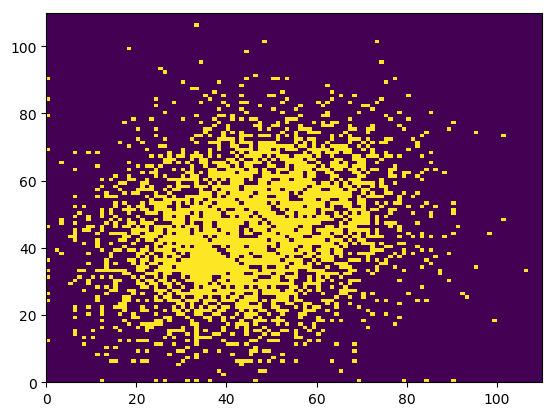

PyObject <matplotlib.collections.QuadMesh object at 0x135de8dd8>

In [67]:
pcolormesh(score_histo)

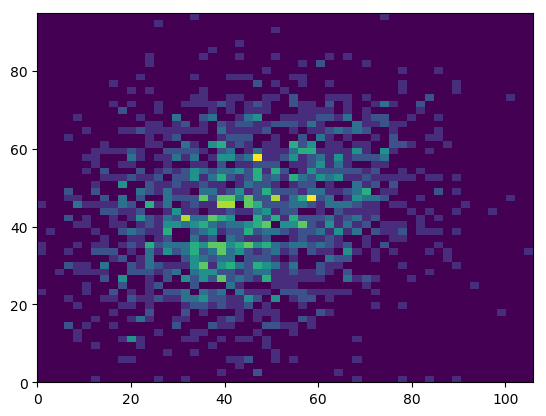

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 1.92727, 3.85455, 5.78182, 7.70909, 9.63636, 11.5636, 13.4909, 15.4182, 17.3455  …  88.6545, 90.5818, 92.5091, 94.4364, 96.3636, 98.2909, 100.218, 102.145, 104.073, 106.0], [0.0, 1.72727, 3.45455, 5.18182, 6.90909, 8.63636, 10.3636, 12.0909, 13.8182, 15.5455  …  79.4545, 81.1818, 82.9091, 84.6364, 86.3636, 88.0909, 89.8182, 91.5455, 93.2727, 95.0], PyObject <matplotlib.collections.QuadMesh object at 0x14d502208>)

In [74]:
hist2D(scores_wide.totalPoints_red, scores_wide.totalPoints_blue, bins=55)